# Pitney Bowes Data Challenge_Team 2 
## Noyonika, Balakumaran , Eun Hee

##### Import Data and Check

In [1]:
import pandas as pd

In [2]:
df1 =  pd.read_csv("train updated 04132022.csv")
# Check missing values
df1.isna().sum()

deviceid                          0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
avg_time_charging_lag7           66
charging_rate_lag3                0
charging_rate_lag7               12
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
avg_time_discharging_lag7        66
discharging_rate_lag3             0
discharging_rate_lag7            12
fail_7                            0
charge_cycle_time_below_12        0
avg_time_charging_lag4            0
avg_time_discharging_lag4         0
avg_time_charging_lag5            7
avg_time_discharging_lag5         7
avg_time_charging_lag6           28
avg_time_discharging_lag6        28
avg_time_charging_lag8          162
avg_time_discharging_lag8       162
avg_time_charging_lag9          374
avg_time_discharging_lag9       374
avg_time_charging_lag10         797
avg_time_discharging_lag10      797
avg_time_charging_lag11     

##### Performing Mean, Median, Mode Imputation

In [3]:
lists_via_MMM_imputation = ["avg_time_charging_lag7", 
"charging_rate_lag7",
"charging_rate_lag6",
"avg_time_discharging_lag7",
"discharging_rate_lag7",
"avg_time_charging_lag5",
"avg_time_discharging_lag5",
"avg_time_charging_lag6",
"avg_time_charging_lag8",
"avg_time_discharging_lag8",       
"avg_time_charging_lag9",          
"avg_time_discharging_lag9",       
"avg_time_charging_lag10",         
"avg_time_discharging_lag10",      
"avg_time_charging_lag11",        
"avg_time_discharging_lag11",
"avg_time_discharging_lag6",
"discharging_rate_lag6",
"discharging_rate_lag8"]

In [4]:
df2 = df1.copy()

In [5]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [6]:
# Find the median of the feature and insert it into a new dataframe
def impute_nan(df1,df2,variable):
    median = df1[variable].median()
    df2[variable+"_median"]=df2[variable].fillna(median)
    return df2

In [7]:
for i in lists_via_MMM_imputation:
    impute_nan(df1,df2,i)

##### Performing Imputation via Random Sample method

In [8]:
# Fill the NaN via random sample method , these are the features
impute_nan_via_Random_Sample =  ["avg_time_charging_lag12",
'avg_time_discharging_lag12',           
"avg_time_charging_lag13",           
"avg_time_discharging_lag13",          
"avg_time_charging_lag14",         
"avg_time_discharging_lag14"]

In [9]:
# It will have the random sample to fill the na
def impute_nan_2(df,variable):
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [10]:
for i in impute_nan_via_Random_Sample:
    impute_nan_2(df2,i)

In [11]:
df2 = df2.drop(columns = ["avg_time_charging_lag12",
'avg_time_discharging_lag12',           
"avg_time_charging_lag13",           
"avg_time_discharging_lag13",          
"avg_time_charging_lag14",         
"avg_time_discharging_lag14","avg_time_charging_lag7", 
"charging_rate_lag7", 
"avg_time_discharging_lag7",
"discharging_rate_lag7",
"avg_time_charging_lag5",
"avg_time_discharging_lag5",
"avg_time_charging_lag6",
"avg_time_charging_lag8",
"avg_time_discharging_lag8",       
"avg_time_charging_lag9",          
"avg_time_discharging_lag9",       
"avg_time_charging_lag10",         
"avg_time_discharging_lag10",      
"avg_time_charging_lag11",        
"avg_time_discharging_lag11","avg_time_discharging_lag6",
"discharging_rate_lag6",
"discharging_rate_lag8",
"charging_rate_lag6"])

In [12]:
# Check if there is remian missing values
df2.isna().sum()

deviceid                             0
avg_time_charging_lag1               0
avg_time_charging_lag2               0
avg_time_charging_lag3               0
charging_rate_lag3                   0
avg_time_discharging_lag1            0
avg_time_discharging_lag2            0
avg_time_discharging_lag3            0
discharging_rate_lag3                0
fail_7                               0
charge_cycle_time_below_12           0
avg_time_charging_lag4               0
avg_time_discharging_lag4            0
discharging_rate_lag4                0
discharging_rate_lag5                0
charging_rate_lag4                   0
charging_rate_lag5                   0
chargecycles                         0
dischargecycles                      0
total_off_time                       0
number_times_restart                 0
avg_volt_change_charging             0
avg_volt_change_discharging          0
avg_time_charging                    0
avg_time_discharging                 0
max_voltage_day          

In [13]:
df2.shape

(40500, 55)

##### Aggregation for lags

In [14]:
# Writing Custom Functions to aggregate
def aggregate(df):
    df_aggregate = df.copy()
    df_aggregate['avg_charging_rate_for_all_lags'] = df[['charging_rate_lag3','charging_rate_lag6_median',
'charging_rate_lag4',
'charging_rate_lag5',
'charging_rate_lag7_median']].mean(axis=1)
    
    df_aggregate['avg_discharge_time_for_all_lags'] = df[['avg_time_discharging_lag1',
'avg_time_discharging_lag2',
'avg_time_discharging_lag3',
'avg_time_discharging_lag4',
'avg_time_discharging',
'avg_time_discharging_lag7_median',
'avg_time_discharging_lag5_median',
'avg_time_discharging_lag6_median',
'avg_time_discharging_lag8_median',
'avg_time_discharging_lag9_median',
'avg_time_discharging_lag10_median',
'avg_time_discharging_lag11_median',
'avg_time_discharging_lag12_random',
'avg_time_discharging_lag13_random',
'avg_time_discharging_lag14_random']].mean(axis=1)
    
    df_aggregate['avg_discharging_rate_for_all_lags'] = df[[
'discharging_rate_lag3',
'discharging_rate_lag4',
'discharging_rate_lag5',
'discharging_rate_lag7_median','discharging_rate_lag6_median','discharging_rate_lag8_median']].mean(axis=1)
    
    df_aggregate['avg_charge_time_for_all_lags'] = df[['avg_time_charging_lag1',
'avg_time_charging_lag2',
'avg_time_charging_lag3',
'avg_time_charging_lag4',
'avg_time_charging',
'avg_time_charging_lag7_median',
'avg_time_charging_lag5_median',
'avg_time_charging_lag6_median',
'avg_time_charging_lag8_median',
'avg_time_charging_lag9_median',
'avg_time_charging_lag10_median',
'avg_time_charging_lag11_median',
'avg_time_charging_lag12_random',
'avg_time_charging_lag13_random',
'avg_time_charging_lag14_random']].mean(axis=1)
    
    df_aggregate = df_aggregate.drop(['avg_time_discharging_lag1',
'avg_time_discharging_lag2',
'avg_time_discharging_lag3',
'avg_time_discharging_lag4',
'avg_time_discharging',
'avg_time_discharging_lag7_median',
'avg_time_discharging_lag5_median',
'avg_time_discharging_lag6_median',
'avg_time_discharging_lag8_median',
'avg_time_discharging_lag9_median',
'avg_time_discharging_lag10_median',
'avg_time_discharging_lag11_median',
'avg_time_discharging_lag12_random',
'avg_time_discharging_lag13_random',
'avg_time_discharging_lag14_random','charging_rate_lag3','charging_rate_lag6_median',
'charging_rate_lag4',
'charging_rate_lag5',
'charging_rate_lag7_median','avg_time_charging_lag1',
'avg_time_charging_lag2',
'avg_time_charging_lag3',
'avg_time_charging_lag4',
'avg_time_charging',
'avg_time_charging_lag7_median',
'avg_time_charging_lag5_median',
'avg_time_charging_lag6_median',
'avg_time_charging_lag8_median',
'avg_time_charging_lag9_median',
'avg_time_charging_lag10_median',
'avg_time_charging_lag11_median',
'avg_time_charging_lag12_random',
'avg_time_charging_lag13_random',
'avg_time_charging_lag14_random','discharging_rate_lag3',
'discharging_rate_lag4',
'discharging_rate_lag5',
'discharging_rate_lag7_median','discharging_rate_lag6_median','discharging_rate_lag8_median'], axis=1)
    return df_aggregate

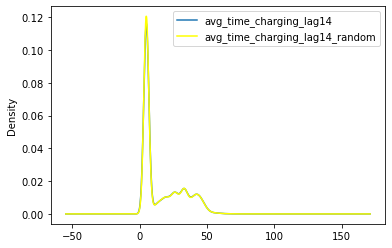

In [15]:
# Check Kernal Density

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df1['avg_time_charging_lag14'].plot(kind='kde', ax=ax)
df2.avg_time_charging_lag14_random.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [16]:
df3 = aggregate(df2)

In [17]:
# Columns after imputation and aggregation
df3.columns

Index(['deviceid', 'fail_7', 'charge_cycle_time_below_12', 'chargecycles',
       'dischargecycles', 'total_off_time', 'number_times_restart',
       'avg_volt_change_charging', 'avg_volt_change_discharging',
       'max_voltage_day', 'piececount', 'cycle_time', 'LastRecord',
       'Date Deployed', 'avg_charging_rate_for_all_lags',
       'avg_discharge_time_for_all_lags', 'avg_discharging_rate_for_all_lags',
       'avg_charge_time_for_all_lags'],
      dtype='object')

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   deviceid                           40500 non-null  int64  
 1   fail_7                             40500 non-null  int64  
 2   charge_cycle_time_below_12         40500 non-null  bool   
 3   chargecycles                       40500 non-null  float64
 4   dischargecycles                    40500 non-null  float64
 5   total_off_time                     40500 non-null  float64
 6   number_times_restart               40500 non-null  float64
 7   avg_volt_change_charging           40500 non-null  float64
 8   avg_volt_change_discharging        40500 non-null  float64
 9   max_voltage_day                    40500 non-null  float64
 10  piececount                         40500 non-null  float64
 11  cycle_time                         40500 non-null  flo

In [19]:
# Fixing the Date
# Covert to Datetime
df3['LastRecord'] = pd.to_datetime(df3['LastRecord'])
df3['Date Deployed'] = pd.to_datetime(df3['Date Deployed'])
# Calculate days between LastRecord ~ DateDeployed
df3['Days'] = df3['LastRecord'] - df3['Date Deployed']
df3['Days'] = df3['Days'].dt.days.astype('int16')
df3['Days']

0        543
1        522
2        518
3        548
4        566
        ... 
40495    574
40496    561
40497    531
40498    547
40499    563
Name: Days, Length: 40500, dtype: int16

In [20]:
df3.drop(['LastRecord','Date Deployed'], axis=1, inplace=True)

In [23]:
# Convert Boolean to int
df3['charge_cycle_time_below_12']=df3['charge_cycle_time_below_12'].astype('category').cat.codes
df3['charge_cycle_time_below_12']

0        0
1        0
2        0
3        0
4        1
        ..
40495    1
40496    1
40497    1
40498    1
40499    1
Name: charge_cycle_time_below_12, Length: 40500, dtype: int8

In [24]:
# Final dataframe
df3.shape

(40500, 17)

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   deviceid                           40500 non-null  int64  
 1   fail_7                             40500 non-null  int64  
 2   charge_cycle_time_below_12         40500 non-null  int8   
 3   chargecycles                       40500 non-null  float64
 4   dischargecycles                    40500 non-null  float64
 5   total_off_time                     40500 non-null  float64
 6   number_times_restart               40500 non-null  float64
 7   avg_volt_change_charging           40500 non-null  float64
 8   avg_volt_change_discharging        40500 non-null  float64
 9   max_voltage_day                    40500 non-null  float64
 10  piececount                         40500 non-null  float64
 11  cycle_time                         40500 non-null  flo

In [26]:
df3.isna().sum()

deviceid                             0
fail_7                               0
charge_cycle_time_below_12           0
chargecycles                         0
dischargecycles                      0
total_off_time                       0
number_times_restart                 0
avg_volt_change_charging             0
avg_volt_change_discharging          0
max_voltage_day                      0
piececount                           0
cycle_time                           0
avg_charging_rate_for_all_lags       0
avg_discharge_time_for_all_lags      0
avg_discharging_rate_for_all_lags    0
avg_charge_time_for_all_lags         0
Days                                 0
dtype: int64

In [28]:
df3.to_csv('train_data_cleaned.csv')